In [1]:
!pip install openpyxl

In [2]:
import pandas as pd

In [3]:
# dados é um DataFrame
df_excel = pd.read_excel("https://github.com/SandraRojasZ/Machine-Learning-and-Time-Series/blob/main/Chess.xlsx?raw=true", engine='openpyxl')

In [4]:
df_csv = pd.read_csv("https://github.com/SandraRojasZ/Machine-Learning-and-Time-Series/blob/main/Tomato.csv?raw=true", sep=",")

In [5]:
df_excel.head(2)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4


In [6]:
# últimas linhas
df_csv.tail()

,Date,Unit,Minimum,Maximum,Average,Market
2736,2021-05-09,Kg,10,15,12.5,Tomato
2737,2021-05-10,Kg,10,15,12.5,Tomato
2738,2021-05-11,Kg,10,15,12.5,Tomato
2739,2021-05-12,Kg,30,35,32.5,Tomato
2740,2021-05-13,Kg,35,40,37.5,Tomato


In [7]:
# Total linhas e colunas
df_csv.shape

(2741, 6)

In [8]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rated           20058 non-null  bool   
 1   created_at      20058 non-null  float64
 2   last_move_at    20058 non-null  float64
 3   turns           20058 non-null  int64  
 4   victory_status  20058 non-null  object 
 5   winner          20058 non-null  object 
 6   increment_code  20058 non-null  object 
 7   white_id        20058 non-null  object 
 8   white_rating    20058 non-null  int64  
 9   black_id        20058 non-null  object 
 10  black_rating    20058 non-null  int64  
 11  opening_eco     20058 non-null  object 
 12  opening_name    20058 non-null  object 
 13  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 2.0+ MB


In [9]:
df_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
Minimum,2741.0,35.089748,16.648425,8.0,22.0,30.0,45.0,115.0
Maximum,2741.0,41.281284,17.364135,12.0,30.0,38.0,50.0,120.0
Average,2741.0,38.185516,16.970949,10.0,25.0,35.0,47.5,117.5


In [10]:
# Mostra os dados da coluna
set(df_excel['victory_status'])

{'draw', 'mate', 'outoftime', 'resign'}

In [11]:
def categorizar_tomate_media(media):
  if media >= 40 and media <= 70:
    return "tomate médio"
  elif media < 40:
    return "tomate pequeno"
  else:
    return "tomatão"

In [12]:
df_csv["categoria_tomate"] = df_csv["Average"].apply(categorizar_tomate_media)

In [13]:
df_csv.head(2)

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate pequeno


In [14]:
df_csv.groupby(["categoria_tomate"]).describe()

Minimum                                                      \
                   count       mean       std   min   25%   50%   75%    max   
categoria_tomate                                                               
tomate médio       954.0  47.818658  8.203065  30.0  40.0  45.0  55.0   65.0   
tomate pequeno    1638.0  23.978022  7.175572   8.0  18.0  25.0  30.0   38.0   
tomatão            149.0  75.744966  7.324666  65.0  70.0  75.0  80.0  115.0   

                 Maximum             ...              Average             \
                   count       mean  ...   75%    max   count       mean   
categoria_tomate                     ...                                   
tomate médio       954.0  55.009434  ...  60.0   75.0   954.0  51.414046   
tomate pequeno    1638.0  29.528694  ...  35.0   44.0  1638.0  26.753358   
tomatão            149.0  82.583893  ...  85.0  120.0   149.0  79.164430   

                                                           
                       std   min   25%   50%   75%    max  
categoria_tomate                                           
tomate médio      8.272792  40.0  45.0  50.0  57.5   70.0  
tomate pequeno    7.191735  10.0  21.5  27.5  32.5   39.5  
tomatão           7.367396  70.5  75.0  77.5  82.5  117.5  

[3 rows x 24 columns]

In [15]:
filtro = df_csv["Average"] < 40
df_csv.loc[filtro]

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate pequeno
...,...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,Tomato,tomate pequeno
2737,2021-05-10,Kg,10,15,12.5,Tomato,tomate pequeno
2738,2021-05-11,Kg,10,15,12.5,Tomato,tomate pequeno
2739,2021-05-12,Kg,30,35,32.5,Tomato,tomate pequeno


Numpy

In [16]:
import numpy as np

In [17]:
arr_list = np.array([1,2,3,4,5,6,7,8])

In [18]:
print(arr_list)

[1 2 3 4 5 6 7 8]


In [19]:
arr_zeros = np.zeros((4,6))
print(arr_zeros)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [20]:
arr_ones = np.ones((3,4))
print(arr_ones)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [21]:
arr_radom = np.random.rand(3,4)
print(arr_radom)

[[0.32016242 0.18919638 0.90209669 0.86068741]
 [0.15773702 0.80510573 0.03777851 0.33067325]
 [0.42935684 0.44179801 0.64969335 0.14990248]]


In [22]:
print(arr_radom.shape)

(3, 4)


In [23]:
arr_radom_reshape = arr_radom.reshape((4,3))
print(arr_radom_reshape)

[[0.32016242 0.18919638 0.90209669]
 [0.86068741 0.15773702 0.80510573]
 [0.03777851 0.33067325 0.42935684]
 [0.44179801 0.64969335 0.14990248]]


In [24]:
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])
arr3 = np.array([[9, 10], [11, 12]])

In [25]:
arr1

array([[1, 2],
       [3, 4]])

In [26]:
arr4 = np.concatenate((arr1, arr2, arr3), axis=1)

In [27]:
arr4

array([[ 1,  2,  5,  6,  9, 10],
       [ 3,  4,  7,  8, 11, 12]])

In [28]:
arr4_split = np.split(arr4, 2)
print(arr4_split)

[array([[ 1,  2,  5,  6,  9, 10]]), array([[ 3,  4,  7,  8, 11, 12]])]


In [29]:
arr4_transpose = np.transpose(arr4)
print(arr4_transpose)

[[ 1  3]
 [ 2  4]
 [ 5  7]
 [ 6  8]
 [ 9 11]
 [10 12]]


In [30]:
arr4_revertido = arr4_transpose.T

In [31]:
arr4_revertido

array([[ 1,  2,  5,  6,  9, 10],
       [ 3,  4,  7,  8, 11, 12]])

In [32]:
arr_a = np.array([1, 7, 27])
arr_b = np.array([1, 5, 1])

In [33]:
arr_a_b = np.add(arr_a, arr_b)
arr_a_b

array([ 2, 12, 28])

In [34]:
arr_sub_a_b = np.subtract(arr_a, arr_b)
arr_sub_a_b

array([ 0,  2, 26])

Matplolib

In [35]:
import matplotlib.pyplot as plt

In [39]:
df_tomato = df_csv

In [40]:
df_tomato.head()

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate pequeno


In [41]:
df_tomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2741 non-null   object 
 1   Unit              2741 non-null   object 
 2   Minimum           2741 non-null   int64  
 3   Maximum           2741 non-null   int64  
 4   Average           2741 non-null   float64
 5   Market            2741 non-null   object 
 6   categoria_tomate  2741 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 150.0+ KB


In [43]:
df_tomato["Date"] = pd.to_datetime(df_tomato["Date"])

In [44]:
df_tomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2741 non-null   datetime64[ns]
 1   Unit              2741 non-null   object        
 2   Minimum           2741 non-null   int64         
 3   Maximum           2741 non-null   int64         
 4   Average           2741 non-null   float64       
 5   Market            2741 non-null   object        
 6   categoria_tomate  2741 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 150.0+ KB


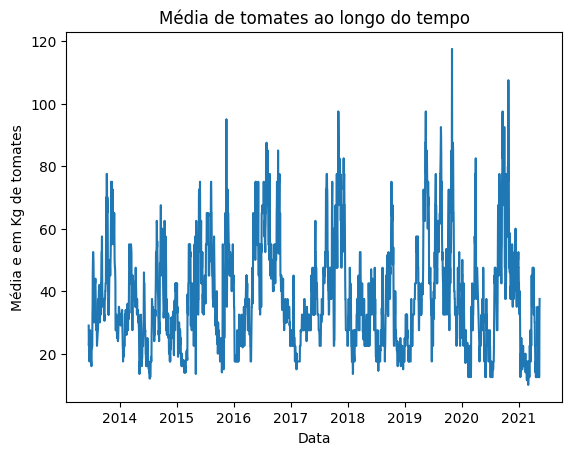

In [47]:
plt.plot(df_tomato["Date"], df_tomato["Average"])
plt.xlabel("Data")
plt.ylabel("Média e em Kg de tomates")
plt.title("Média de tomates ao longo do tempo")
plt.show()